# Loading data items CSV

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('white')

In [16]:
fname = 'data_items.csv'
df = pd.read_csv(fname, header=1)

In [17]:
df = df.iloc[:195, :]
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [18]:
df.head()

,Title,Year,Authors,Journal/origin,Arxiv preprint?,Lab / School / Company,Nb of pages,Domain,domain1,domain2,...,Baseline model type,Statistical analysis of performance,Analysis of learned parameters,Discussion,Limitations/Obstacles,Code Available?,Limited Data,Others & Comments,Analyzed by,Reviewed by
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Waseda University,4.0,Transportation,Classification of EEG signals,Monitoring,...,None,NaN,No,"""This study does not impose in any way a direc...",NaN,No,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,Cleaning EEG Signals,Improvement of processing tools,Signal cleaning,...,Traditional pipeline,NaN,NaN,"""Compared with the classical OAs removal metho...",NaN,No,No,Poorly written... :( The way some elements are...,Yannick,Hubert
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,"Duke-NUS Medical School, Singapore\nUniversity...",11.0,Sleep,Classification of EEG signals,Clinical,...,None,NaN,No,"""... our framework provides a practicable, val...",N/M,No,No,"Great paper, with most of the information avai...",Yannick,Hubert
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,UBC,12.0,Epilepsy,Classification of EEG signals,Clinical,...,Traditional pipeline,NaN,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,"National Polytechnic Institute, Mexico",7.0,BCI,Classification of EEG signals,BCI,...,Traditional pipeline,NaN,Yes (visualization of learned parameters),The analysis of the DNN first layer weights re...,N/M,No,No,They say that it could go up to 220 commands!!...,Yannick,Hubert


## Sanity checks

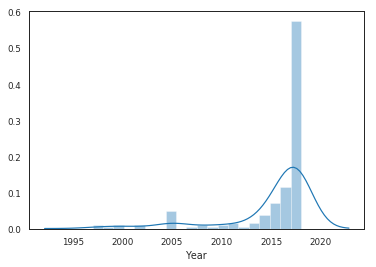

In [5]:
sns.distplot(df['Year'].dropna(axis=0))

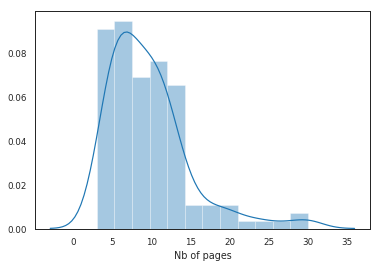

In [6]:
sns.distplot(df['Nb of pages'].dropna(axis=0))

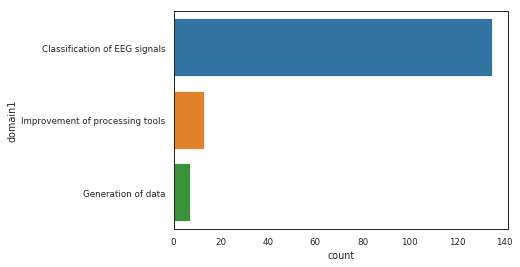

In [7]:
sns.countplot(y='domain1', data=df)

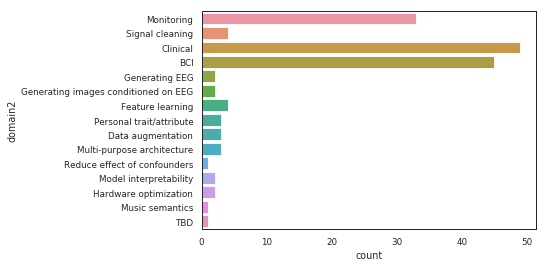

In [8]:
sns.countplot(y='domain2', data=df)

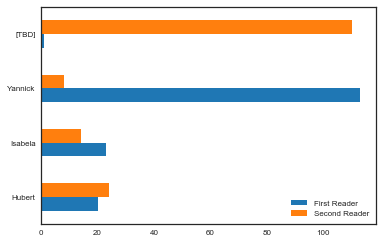

In [131]:
#df[['Analyzed by', 'Reviewed by']].apply(pd.value_counts).plot(kind='barh')
df[['First Reader', 'Second Reader']].apply(pd.value_counts).plot(kind='barh')

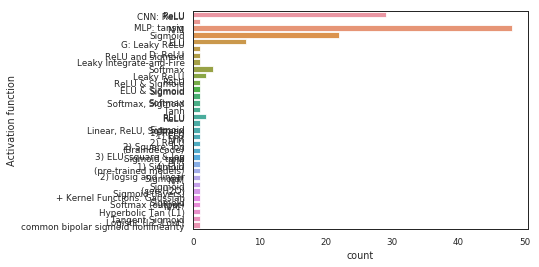

In [10]:
sns.countplot(y='Activation function', data=df)

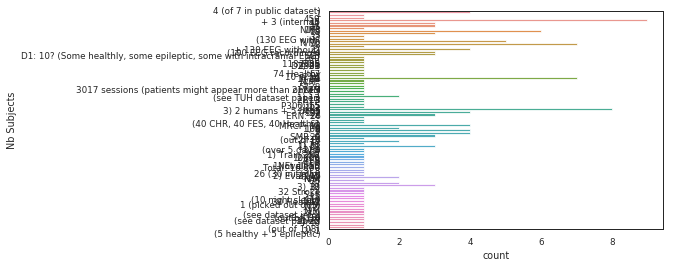

In [11]:
sns.countplot(y='Nb Subjects', data=df)

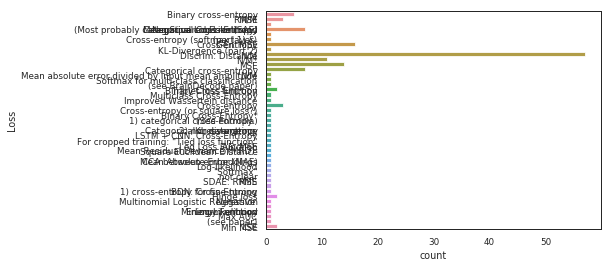

In [12]:
sns.countplot(y='Loss', data=df)

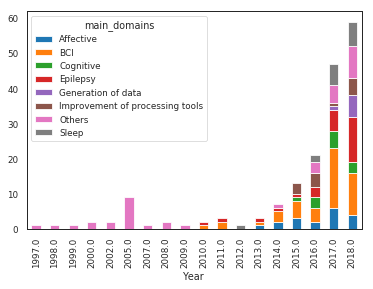

In [61]:
main_domains = ['Epilepsy', 'Sleep', 'BCI', 'Affective', 'Cognitive', 
                'Improvement of processing tools', 'Generation of data']
domains_df = df[['domain1', 'domain2', 'domain3', 'domain4']]
df['main_domains'] = [row[row.isin(main_domains)].values[0] 
                              if any(row.isin(main_domains)) else 'Others' for ind, row in domains_df.iterrows()]
df.groupby(['Year', 'main_domains']).size().unstack('main_domains').plot(kind='bar', stacked=True)

## Yannick addons. (temp stuff)

#1 - Download:
https://docs.google.com/spreadsheet/ccc?key=1smpU0WSlSq-Al2u_QH3djGn68mTuHlth2fNJTrD3wa8&output=csv

#2 - Rename it to "papers.csv"

In [11]:
%matplotlib inline

fname = 'paperx.csv'
df = pd.read_csv(fname, header=1)

In [13]:
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [14]:
df.head()

,Sleep,Internal Recordings,Patanaik2018
0,Epilepsy,Bonn University Dataset,Hussein2018
1,BCI,Internal Recordings,Perez-Benitez2018
2,Other,Internal Recordings,Ghosh2018
3,BCI,eegmmidb,Zhang2018c
4,BCI,BCI Competition,Hasib2018


In [10]:
# Inspired by: AKuederle
# https://github.com/AKuederle/Py-Tex-automation-example

import pandas as pd
import tex_utils

#papers = pd.read_csv('./paperx.csv')
papers = pd.read_csv('./papers.csv', header=1)

papers = papers.dropna(axis=1, how='all')

domains = set(papers['Domain'].dropna(axis=0, how='all'))

nested_datasets = {}

for domain in domains:
    print('Domain:' + domain)

    sub_papers = papers[papers['Domain'] == domain]
    sub_datasets = sub_papers['Dataset name'].dropna(axis=0, how='all')

    # 1 Paper might use multiple datasets
    l = [dsname.split(";\n") for dsname in sub_datasets]
    sub_datasets = set([item for sublist in l for item in sublist])

    # ========================================
    # Handle exception to make it "prettier".
    # Exception 1: Combining datasets.
    # - BCI Competition Datasets.
    # ========================================
    tex_utils.combine_datasets(sub_datasets, "BCI Competition")
    tex_utils.combine_datasets(sub_datasets, "TUH")

    # Step 3 - Create nested list of publications per dataset for this domain.
    nested_list = {k: list(sub_papers[sub_papers['Dataset name'].str.contains(k)]['Citation']) for k in sub_datasets}

    # ========================================
    # Handle exception to make it "prettier".
    # Exception 2: Datasets used only once.
    # ========================================
    toBeRemoved = []
    others = []
    for dataset in nested_list:
        if len(nested_list[dataset]) < 2:
            others.append(nested_list[dataset])
            toBeRemoved.append(dataset)

    for dataset in toBeRemoved:
        nested_list.pop(dataset)

    others = [val for sublist in others for val in sublist]
    if len(others) > 0:
        nested_list['Other Datasets'] = others

    #if 'Internal Recordings' in nested_list:
    #    nested_list = move_element(nested_list, "Internal Recordings", 1)
    #if 'Others' in nested_list:
    #    nested_list = move_element(nested_list, "Others", 2)

    # Step 4 - Save the final list of papers per dataset for this domain.
    nested_datasets[domain] = nested_list

print('LaTeX!')
template = tex_utils.get_template('./table_template.tex')
variable_dict = {'datasets': nested_datasets}
texstr = tex_utils.compile_pdf_from_template(template, variable_dict, './dataset_table.pdf')
print('Done!')

Domain:BCI
Domain:Other Pathology*
Domain:General EEG classification
Domain:Cleaning EEG Signals
Domain:Epilepsy
Domain:Sleep
Domain:General Affective
Domain:General Cognitive
Domain:Generating EEG Signals
Domain:Transportation
Domain:Other
LaTeX!
/Users/yannick/Documents/PhD/DL-EEG_Portal/dl-eeg-review/tex_build
Done!


/Users/yannick/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


## Data Accessibility

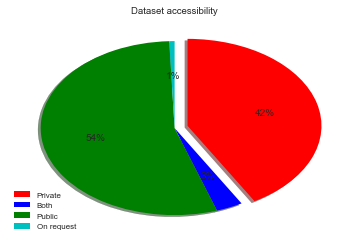

In [130]:
col_name = 'Dataset accessibility'
col_options = ['Private', 'Both', 'Public', 'On request']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]]]
colors = ['r', 'b', 'g', 'c']
explode = (0.1, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

## Code Accessibility

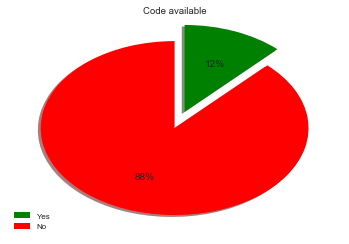

In [102]:
col_name = 'Code available'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.2, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

## Limited Data Available

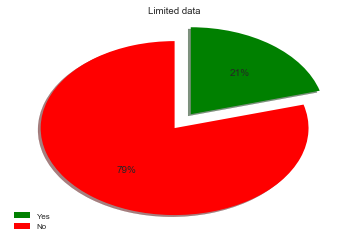

In [103]:
col_name = 'Limited data'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.2, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Domains

In [398]:
#df['Year'] = df['Year'].astype('Int32')
#dfd = df.groupby('Domain')
#domains = set([])
#domain_yearly = []
#for year in range(2010,2018+1):
#    count_yearly = []
#    for domain in df['Domain'].unique():
#        if domain in dfd['Year'].value_counts().index:
#            domains.add(domain)
#            if year in dfd['Year'].value_counts()[domain].index:
#                count_yearly.append(dfd['Year'].value_counts()[domain][year])
#            else:        
#                count_yearly.append(0)
#    domain_yearly.append(count_yearly)
#    
domains = df['Domain'].unique()
domain_yearly = [[df[df.Domain == domain].groupby('Year')['Domain'].value_counts()[year][domain] if year in df[df.Domain == domain].groupby('Year')['Domain'].value_counts().index else 0 for domain in df['Domain'].unique()] for year in range(2010,2018+1)]

domain_yearly

[[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 3, 1, 0, 0, 0, 2, 0],
 [0, 1, 0, 1, 5, 1, 1, 1, 0, 3, 0],
 [1, 2, 2, 3, 4, 3, 0, 3, 2, 2, 0],
 [0, 0, 6, 6, 14, 7, 0, 8, 1, 5, 0],
 [1, 1, 7, 14, 13, 8, 3, 2, 4, 4, 1]]

['Transportation' 'Cleaning EEG Signals' 'Sleep' 'Epilepsy' 'BCI' 'Other'
 'Generating EEG Signals' 'General Cognitive' 'Other Pathology*'
 'General Affective' 'General EEG classification']


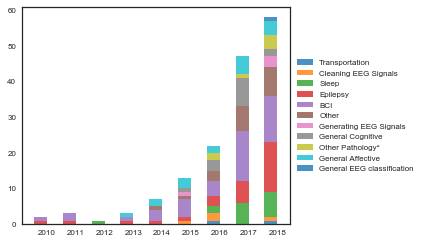

In [399]:
import numpy as np
import matplotlib.pyplot as plt

months = domains #[domain if domain in df['Domain'].values().index df['Domain'].unique()
print(months)

# Some random data for nyears from minyear
nyears = 9
nmonths = len(months)
minyear = 2010
#monthly_counts = np.random.randint(low=2, high=15, size=(nyears,nmonths))
monthly_counts = np.array(domain_yearly)

fig, ax = plt.subplots()
ind = np.arange(nyears)
width = 0.45
# Random colors for the months
#c = np.random.rand(nmonths,3,1)

p = []
for imonth in range(nmonths):
    p.append(ax.bar(ind, monthly_counts[:,imonth], width,
                    bottom=np.sum(monthly_counts[:,:imonth], axis=1),
                    alpha=0.8)
            )

# Set x axis ticks and labels
ax.set_xticks(ind + width/2)
ax.set_xticklabels([str(minyear+i) for i in ind])

# Locate legend outside axes plot area
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend([pl[0] for pl in p], months, loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("./figs/{}.eps".format("Domains per Year"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Datasets

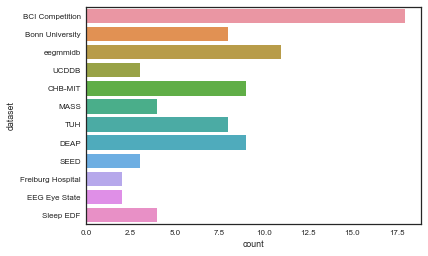

In [95]:
import collections

def remove_me(ds, item_name):
    ds2 = [y for y in ds if y != item_name]
    return ds2

datasets = df['Dataset name']
datasets_full = [dsname.split(";\n") for dsname in datasets]
datasets_ffull = [item for sublist in datasets_full for item in sublist]  

# Combining Datasets
combine_ds = ["BCI Competition", "TUH"]
for c in combine_ds:
    for n, i in enumerate(datasets_ffull):
        if c in i:
            datasets_ffull[n] = c

# Removing Datasets
a = remove_me(datasets_ffull,"Internal Recordings")
for ds in collections.Counter(a).items():
    if ds[1] < 2:
        #print("Removing (<2): " + ds[0])
        a = remove_me(a, ds[0])
        
ds_df = (pd.DataFrame.from_dict(collections.Counter(a), orient='index').reset_index()).rename(columns={'index':'dataset', 0:'count'})
#print(ds_df)

ax = sns.barplot(y='dataset', x='count', data=ds_df)

plt.savefig("./figs/{}.eps".format("Datasets"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Network Graph/Table/Schema

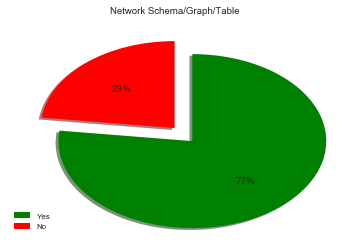

In [106]:
col_name = 'Network Schema/Graph/Table'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.2, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format("Network Schema"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()